Dataset loaded successfully.

--- Initial Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
----------------------------------------

--- Checking for Missing Values ---
LB          21
AC          20
FM           0
UC           0
DL           0
DS        

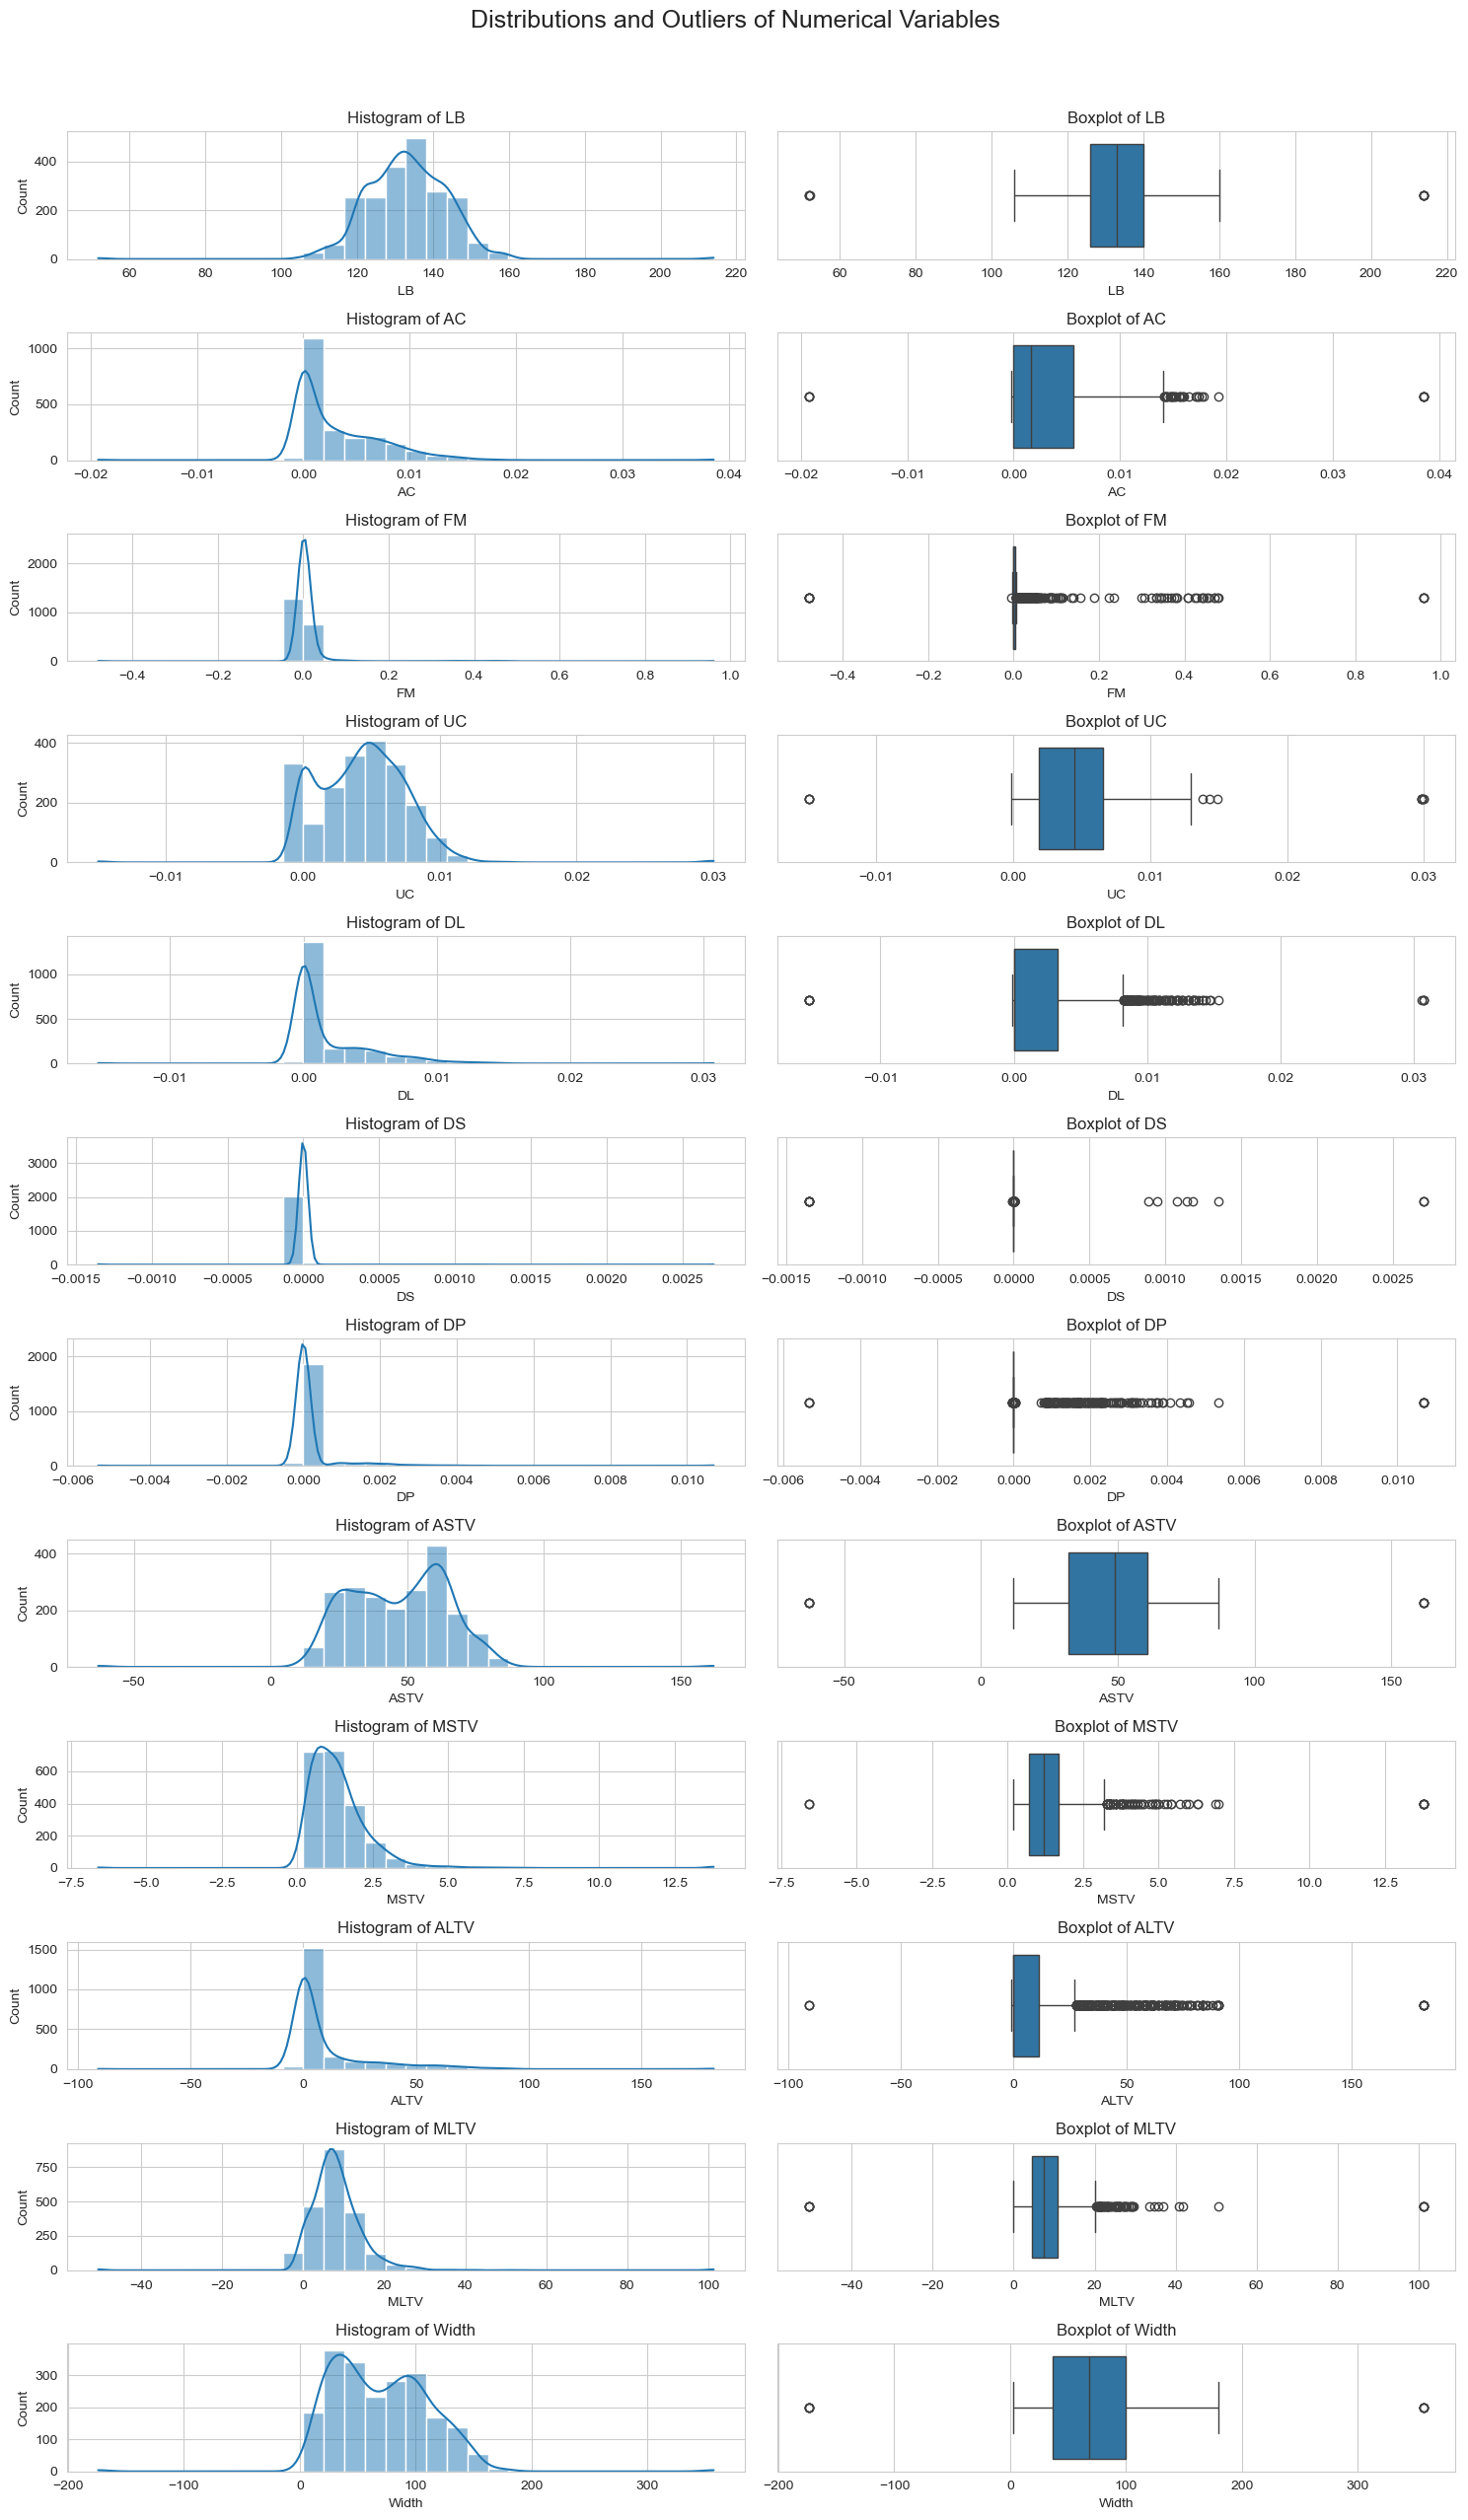

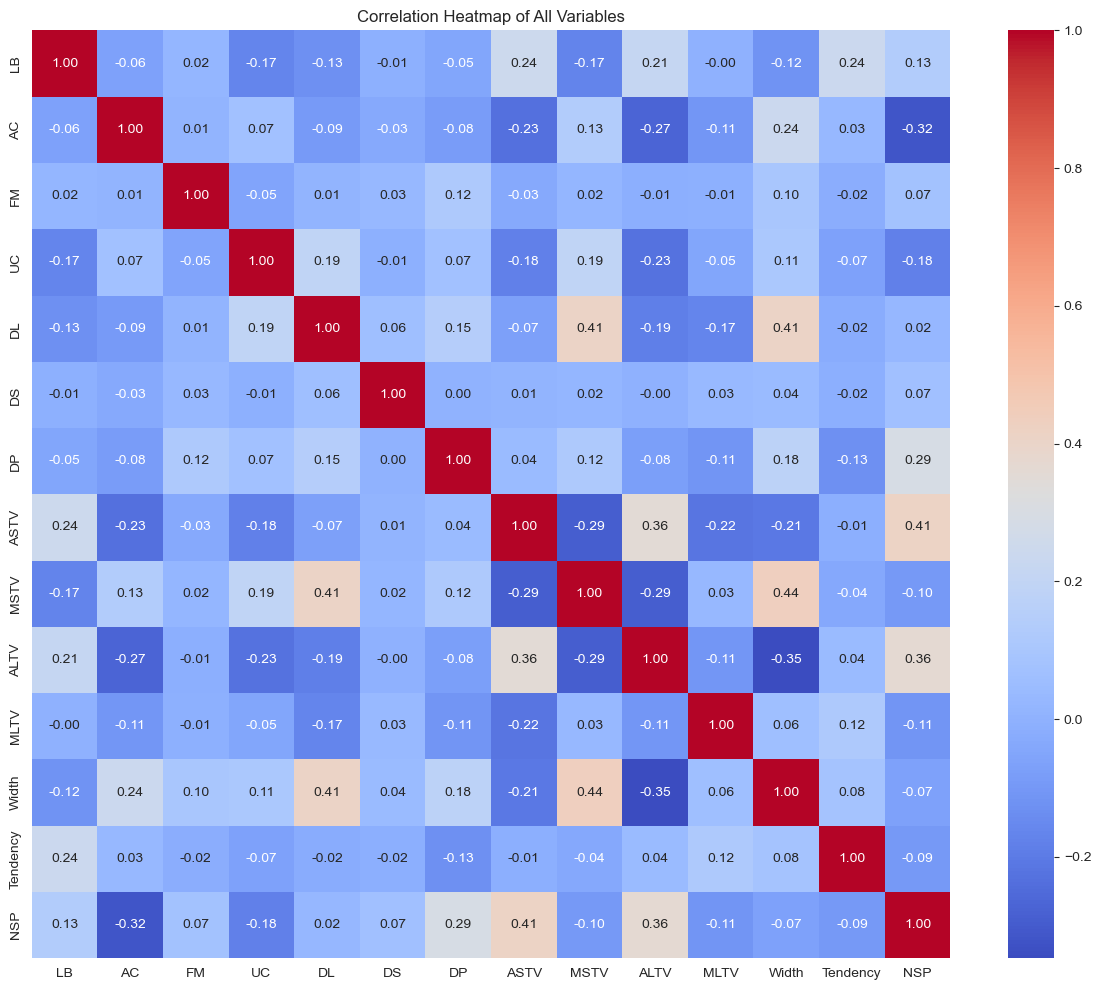

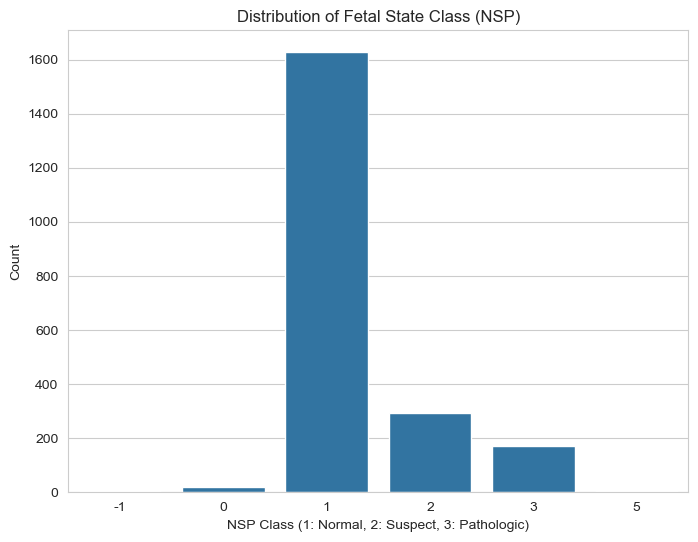


--- Key Insights from Analysis ---
1. Strong positive correlation between 'ALTV' (abnormal long term variability) and 'ASTV' (abnormal short term variability).
2. A negative correlation exists between 'MSTV' (mean short term variability) and 'ASTV'.
3. The count plot for 'NSP' (the target variable) shows a significant class imbalance.

--- Conclusion ---
The exploratory data analysis revealed a clean dataset with well-defined relationships between variables. Key findings include:
- The dataset has no missing values but required minor data type conversions for discrete variables.
- Strong correlations exist among heart rate variability metrics, which can be useful for feature engineering.
- There is a significant class imbalance in the fetal health status variable ('NSP'), which must be addressed in future predictive modeling to avoid biased results.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv("Cardiotocographic.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Cardiotocographic.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("\n--- Initial Data Information ---")
df.info()
print("-" * 40)

print("\n--- Checking for Missing Values ---")
print(df.isnull().sum())
print("-" * 40)

for col in ['Tendency', 'NSP']:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col] = df[col].fillna(0).round().astype(int)

print("\n--- Checking for Duplicate Rows ---")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"{num_duplicates} duplicate rows have been removed.")
print("-" * 40)

print("\n--- Data Information after Cleaning ---")
df.info()
print("-" * 40)

print("\n--- Statistical Summary of Numerical Variables ---")
print(df.describe().T)
print("-" * 40)

print("\n--- Value Counts for Categorical Variables (NSP, Tendency) ---")
print("NSP (Fetal State Class Code):\n", df['NSP'].value_counts())
print("-" * 40)
print("Tendency:\n", df['Tendency'].value_counts())
print("-" * 40)


sns.set_style("whitegrid")

numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 25))
fig.suptitle('Distributions and Outliers of Numerical Variables', fontsize=18, y=1.02)
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Variables')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='NSP', data=df)
plt.title('Distribution of Fetal State Class (NSP)')
plt.xlabel('NSP Class (1: Normal, 2: Suspect, 3: Pathologic)')
plt.ylabel('Count')
plt.show()


print("\n--- Key Insights from Analysis ---")
print("1. Strong positive correlation between 'ALTV' (abnormal long term variability) and 'ASTV' (abnormal short term variability).")
print("2. A negative correlation exists between 'MSTV' (mean short term variability) and 'ASTV'.")
print("3. The count plot for 'NSP' (the target variable) shows a significant class imbalance.")

print("\n--- Conclusion ---")
print("The exploratory data analysis revealed a clean dataset with well-defined relationships between variables. Key findings include:")
print("- The dataset has no missing values but required minor data type conversions for discrete variables.")
print("- Strong correlations exist among heart rate variability metrics, which can be useful for feature engineering.")
print("- There is a significant class imbalance in the fetal health status variable ('NSP'), which must be addressed in future predictive modeling to avoid biased results.")
